In [1]:
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from sklearn.utils.extmath import row_norms

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
rng1 = np.random.RandomState(42)
rng2 = np.random.RandomState(42)

In [15]:
def plot_euclidean_distance_error(n_features=1, dtype='float64', ax=None):
    X = 100*rng1.rand(1000, n_features).astype(dtype)
    Y = 100*rng2.rand(2000, n_features).astype(dtype)

    D_exact = cdist(X, Y)
    D_approx = pairwise_distances(X, Y)

    err = np.abs(D_exact - D_approx)
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 4))
    # compute the distance, normalized by the L2 norm of each vector
    Dist_norm = D_exact / np.sqrt(row_norms(X)[:, None]*row_norms(Y)[None, :])
    ax.loglog(Dist_norm.flatten(),  (err / D_exact).flatten(), '.')
    ax.set_xlabel('Distance between samples (L2 normalized)')
    ax.set_ylabel('Relative error')
    ax.set_xlim(4e-6, 1.1)
    _ = ax.set_title(f'n_features={X.shape[1]}, {X.dtype}')
    
def plot_euclidean_distance_error_fused(n_features=1):
    fig, ax = plt.subplots(1, 2, figsize=(13, 4))
    plot_euclidean_distance_error(n_features, 'float64', ax=ax[0])
    plot_euclidean_distance_error(n_features, 'float32', ax=ax[1])

/home/rth/src/scikit-learn/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


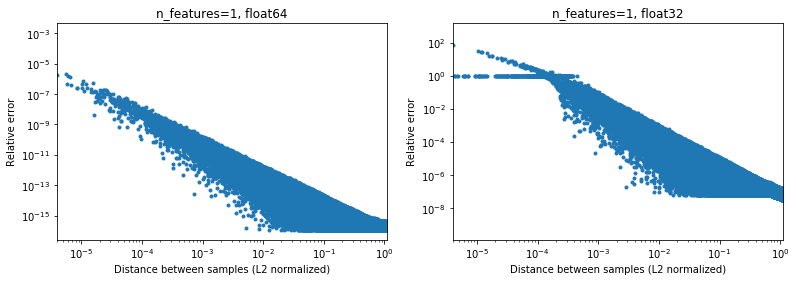

In [16]:
plot_euclidean_distance_error_fused(n_features=1)

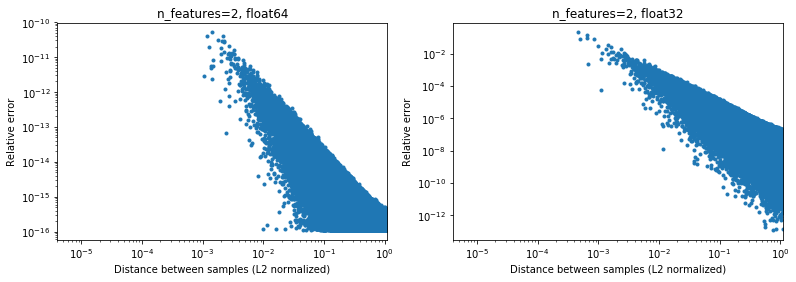

In [19]:
plot_euclidean_distance_error_fused(n_features=2)

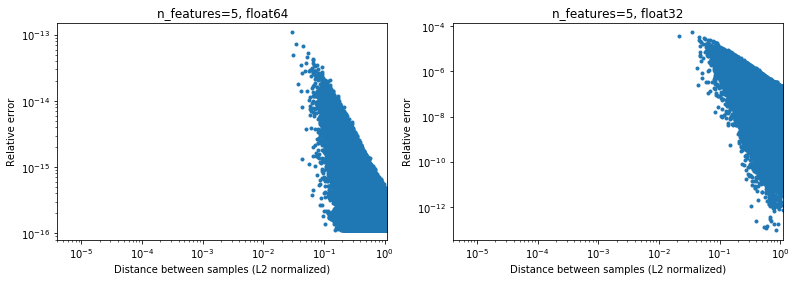

In [20]:
plot_euclidean_distance_error_fused(n_features=5)